# **Exploratory Data Analysis Lab**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-2-862c5c7e4a15>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)

In [7]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [8]:
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [9]:
%matplotlib inline

<Figure size 1200x600 with 0 Axes>

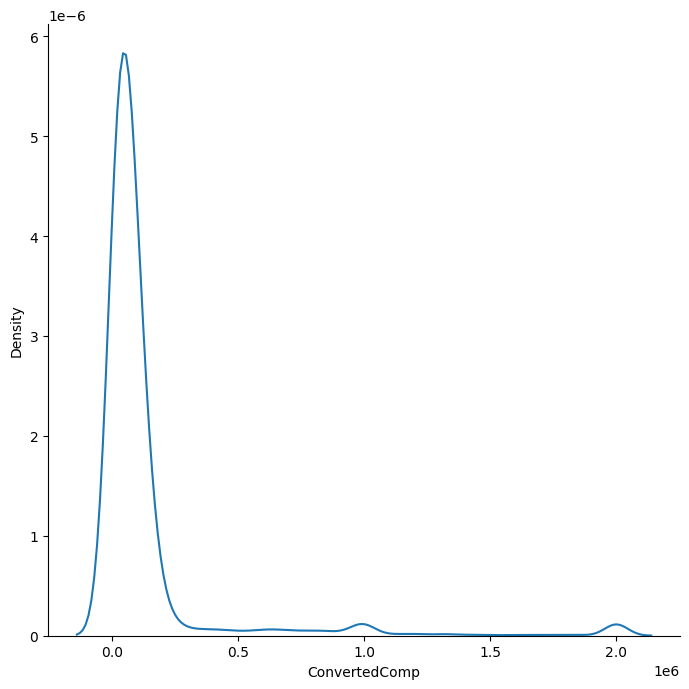

In [10]:
plt.figure(figsize=(12,6))
sns.displot(df['ConvertedComp'], kind='kde', height=7)
plt.show()

Plot the histogram for the column `ConvertedComp`.


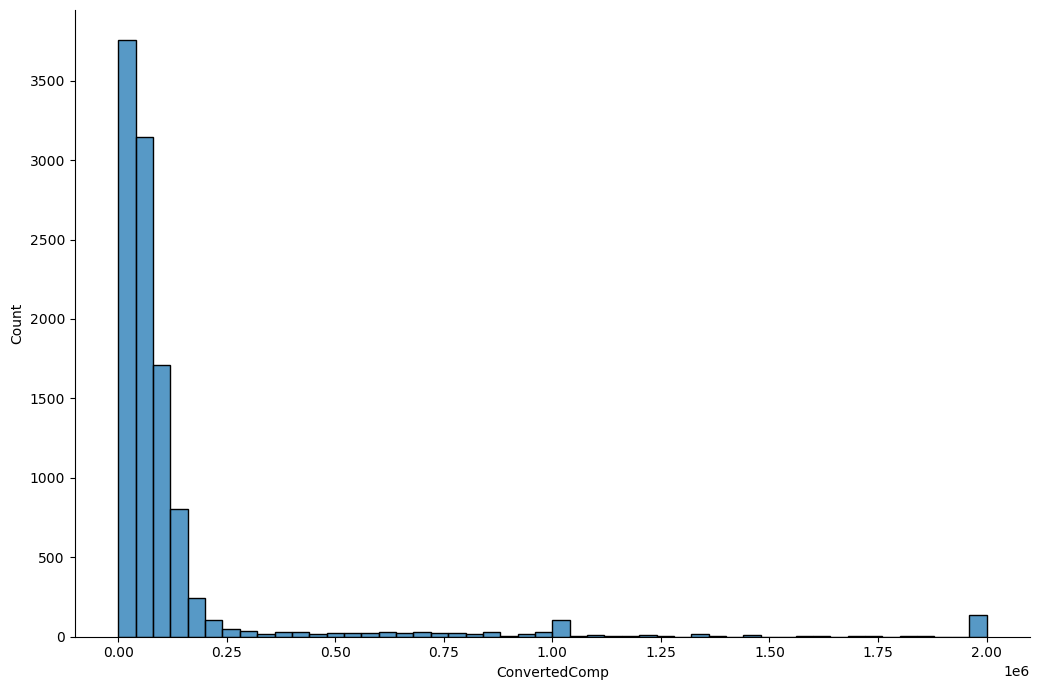

In [11]:
# your code goes here
sns.displot(df['ConvertedComp'], bins=50, height=7, aspect=1.5)
plt.show()

What is the median of the column `ConvertedComp`?


In [12]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

  We can see median for this column: 57.745 (also pct 50th)

How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df['Gender'].value_counts().reset_index()

,Gender,count
0,Man,10480
1,Woman,731
2,"Non-binary, genderqueer, or gender non-conforming",63
3,"Man;Non-binary, genderqueer, or gender non-con...",26
4,"Woman;Non-binary, genderqueer, or gender non-c...",14
5,Woman;Man,9
6,"Woman;Man;Non-binary, genderqueer, or gender n...",2


On total, 10480 responders identified themselves only as a Man

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
df_woman = df[df['Gender'] == 'Woman']
df_woman['ConvertedComp'].describe()

count    6.790000e+02
mean     1.011031e+05
std      2.202510e+05
min      0.000000e+00
25%      2.654650e+04
50%      5.770800e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

We can see the Median annual salary for Woman: 57.708 (Dollars)

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


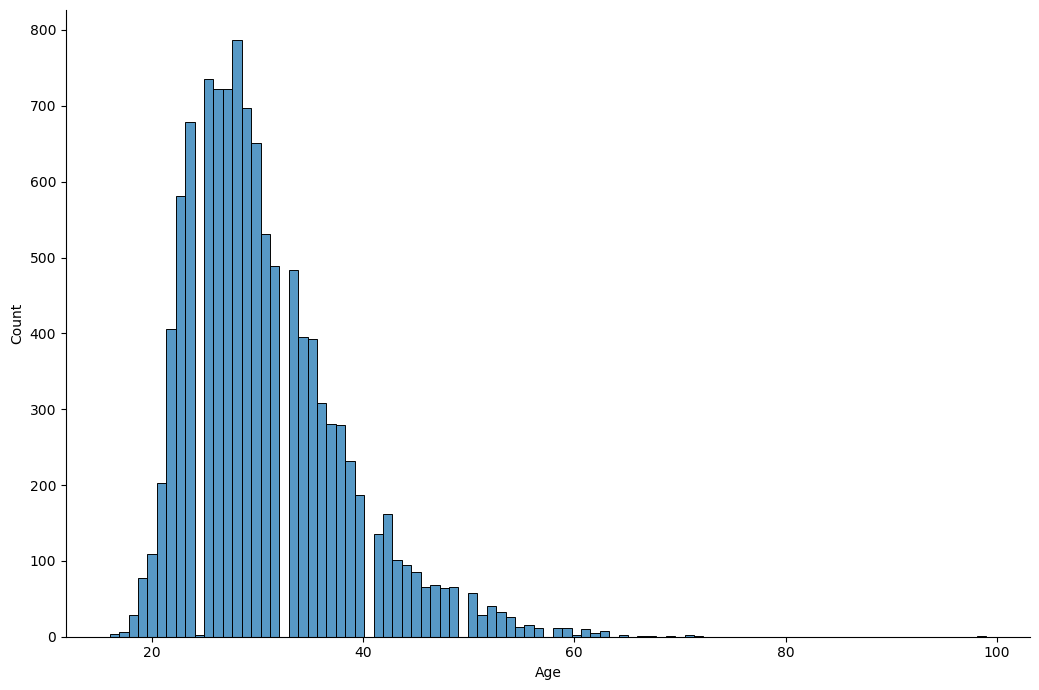

In [16]:
# your code goes here
sns.displot(df['Age'], height=7, aspect=1.5)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

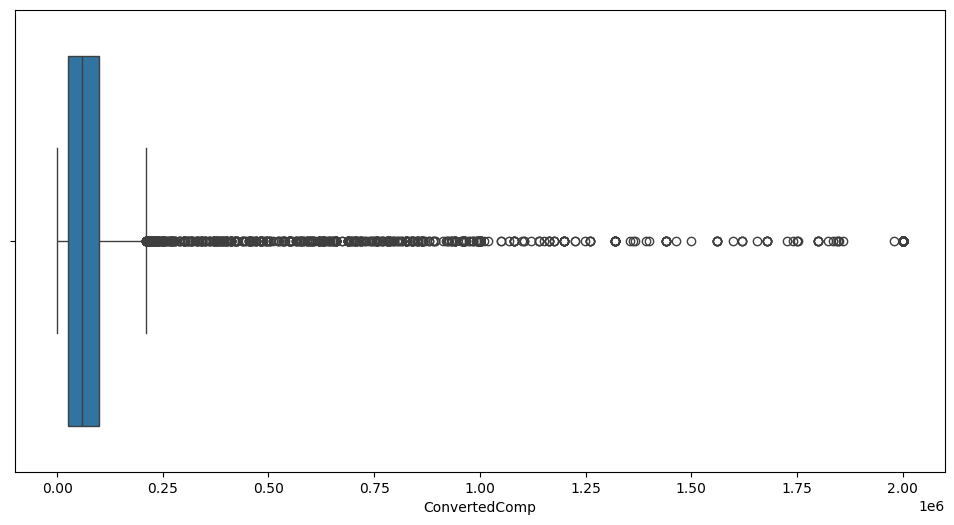

In [17]:
# your code goes here
plt.figure(figsize=(12,6))
sns.boxplot(data=df['ConvertedComp'], orient='h')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
print(f'Q1 : {Q1}')
print(f'Q3 : {Q3}')

IQR = Q3-Q1
print(f"IQR: {IQR}")

Q1 : 26868.0
Q3 : 100000.0
IQR: 73132.0


Find out the upper and lower bounds.


In [23]:
# your code goes here
up_bound = Q3 + IQR*1.5
low_bound = Q1 - IQR*1.5
print(f"Upper Bound is {up_bound}")
print(f"Lower Bound is {low_bound}")

Upper Bound is 209698.0
Lower Bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
# your code goes here
outliers = 0
for value in df['ConvertedComp']:
    if value > up_bound or value < low_bound:
        outliers += 1
print(f"Total outliers is {outliers}")

Total outliers is 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [38]:
index_outliers = df[(df['ConvertedComp'] < low_bound) | (df['ConvertedComp'] > up_bound)].index
df_new = df.drop(index_outliers)
df_new.shape


(10519, 85)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [54]:
numerical_cols_name = df_new.select_dtypes(include=np.number).columns
df_new[numerical_cols_name].corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000


In [55]:
df_new.to_csv("Non_outliers_df.csv")